In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

In [12]:
from matplotlib import style
from sklearn import linear_model
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 


In [13]:
# assign radius1 feature and diagnosis target from datatset
radius = X['radius1']
diagnosis = y['Diagnosis'].map({"M":0, "B":1})
#print(diagnosis)
#print(radius)

# assign colormap
colorMap = {0: "r", 1: "b"}

In [14]:
# create logistic model
lgr = linear_model.LogisticRegression()

# train the model
lgr.fit(X = np.array(radius).reshape(len(radius),1),
        y = diagnosis)

# print the intercept
modelIntercept = lgr.intercept_
print(modelIntercept)

# print the coefficients
modelCoefficients = lgr.coef_
print(modelCoefficients)


[15.120902]
[[-1.02475609]]


In [15]:
# define sigmoid function
def sigmoid(x):
    return (1 / (1 +
                 np.exp(-(modelIntercept[0] +
                          modelCoefficients[0][0] * x)
                        )                
                )
            )


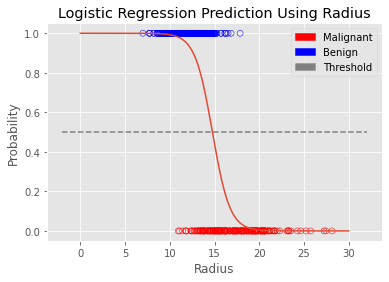

In [16]:
# Plot the sigmoid curve
x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]

style.use("ggplot")

plt.scatter(radius, diagnosis,
            facecolors='none',
            edgecolors=diagnosis.map(colorMap)
            )

plt.plot(x1,y1)
plt.title("Logistic Regression Prediction Using Radius")
plt.xlabel("Radius")
plt.ylabel("Probability")

# Plot threshold line (0.5)
plt.plot([-2,32],[0.5,0.5],
         color='grey',
         ls='--')

# Plot the legend
r = patches.Patch(color='red', label='Malignant')
b = patches.Patch(color='b', label='Benign')
t = patches.Patch(color='grey', linestyle="--", label="Threshold")

plt.legend(handles=[r,b,t], loc=1)
plt.show()


In [17]:
# Predictions when tumor radius (tr) is 18 and 12
for r in [18,12]:
    parg = np.array(r).reshape(-1,1)
    print('--- Model prediction when radius =', r)
    print('Prediction Probabilities:', lgr.predict_proba(parg))
    print('The tumor is probably',
          'malignant' if lgr.predict(parg)[0] == 0 else 'benign')
    print('')

--- Model prediction when radius = 18
Prediction Probabilities: [[0.96526677 0.03473323]]
The tumor is probably malignant

--- Model prediction when radius = 12
Prediction Probabilities: [[0.05605 0.94395]]
The tumor is probably benign

